Traffic Data EDA

# Introduction

### About this Notebook

### Read Data

**Load libraries and set notebook preferences**

In [1]:
#Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
#Set display options for pandas
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:.4f}'.format

#Set options for Matplotlib
plt.style.use('ggplot')

In [3]:
#Set path to raw data location
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\US-Accidents A Countrywide Traffic Accident Dataset\Data\02_Intermediate'

#Timestamp variables to parse
dates = ['Start_Time', 'End_Time', 'Weather_Timestamp']

#Read in data
df = pd.read_csv(path + '/2020_0126_Traffic_Raw_Data_Cleaned.csv',parse_dates= dates, index_col=0, low_memory=False)

#Rename first col
df.rename(columns = {'2020_0126_Traffic_Raw_Data_Cleaned.csv': 'ID'}, inplace= True)


C:\Users\kishe\Miniconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


## Preview data

In [4]:
#Print data shape
print('Data shape: ', df.shape)

display(df.head())

Data shape:  (2974336, 41)


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,City,County,State,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,Three,2016-02-08 05:46:00,2016-02-08 11:00:00,39.8651,-84.0587,0.0100,right lane blocked due to accident on i70 east...,I-70 E,R,Dayton,Montgomery,OH,45424,Eastern,KFFO,2016-02-08 05:58:00,36.9000,91.0000,29.6800,10.0000,Calm,8.2981,Light Rain,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,A-2,MapQuest,Two,2016-02-08 06:07:59,2016-02-08 06:37:59,39.9281,-82.8312,0.0100,accident on brice rd at tussing rd expect delays,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,Eastern,KCMH,2016-02-08 05:51:00,37.9000,100.0000,29.6500,10.0000,Calm,8.2981,Light Rain,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,A-3,MapQuest,Two,2016-02-08 06:49:27,2016-02-08 07:19:27,39.0631,-84.0326,0.0100,accident on oh32 state route 32 westbound at d...,State Route 32,R,Williamsburg,Clermont,OH,45176,Eastern,KI69,2016-02-08 06:56:00,36.0000,100.0000,29.6700,10.0000,SW,3.5000,Overcast,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,A-4,MapQuest,Three,2016-02-08 07:23:34,2016-02-08 07:53:34,39.7478,-84.2056,0.0100,accident on i75 southbound at exits 52 52b us3...,I-75 S,R,Dayton,Montgomery,OH,45417,Eastern,KDAY,2016-02-08 07:38:00,35.1000,96.0000,29.6400,9.0000,SW,4.6000,Mostly Cloudy,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
4,A-5,MapQuest,Two,2016-02-08 07:39:07,2016-02-08 08:09:07,39.6278,-84.1884,0.0100,accident on mcewen rd at oh725 miamisburg cent...,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,Eastern,KMGY,2016-02-08 07:53:00,36.0000,89.0000,29.6500,6.0000,SW,3.5000,Mostly Cloudy,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1


In [5]:
print('Column data types are as follows:\n', df.dtypes)

Column data types are as follows:
 ID                               object
Source                           object
Severity                         object
Start_Time               datetime64[ns]
End_Time                 datetime64[ns]
Start_Lat                       float64
Start_Lng                       float64
Distance(mi)                    float64
Description                      object
Street                           object
Side                             object
City                             object
County                           object
State                            object
Zipcode                          object
Timezone                         object
Airport_Code                     object
Weather_Timestamp        datetime64[ns]
Temperature(F)                  float64
Humidity(%)                     float64
Pressure(in)                    float64
Visibility(mi)                  float64
Wind_Direction                   object
Wind_Speed(mph)                 float64
Weath

### General Statistics about the data

In [6]:
#Capture quantitative variables
qvariables = df.select_dtypes('float64')

#Create empty df to store statistics of qvariables
stats=pd.DataFrame()

#Capture metrics of qvariables and assign to stats. 
stats["Min"]=qvariables.min()
stats["Max"]=qvariables.max()
stats["Avg"]=qvariables.mean()
stats["SD"]=qvariables.std()
stats["Var"]=qvariables.var()

#Transpose for easier reading
stats=stats.T

#View qvariables stats
display(stats)

,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
Min,24.5553,-124.6238,0.0000,-77.8000,1.0000,0.0000,0.0000,0.0000
Max,49.0022,-67.1132,333.6300,170.6000,100.0000,33.0400,140.0000,822.8000
Avg,36.4936,-95.4263,0.2856,62.3512,65.4054,29.8319,9.1508,8.2981
SD,4.9188,17.2188,1.5484,18.6106,22.3313,0.7155,2.8600,4.7425
Var,24.1951,296.4873,2.3975,346.3556,498.6849,0.5120,8.1796,22.4911


### Quantitative Data Distributions

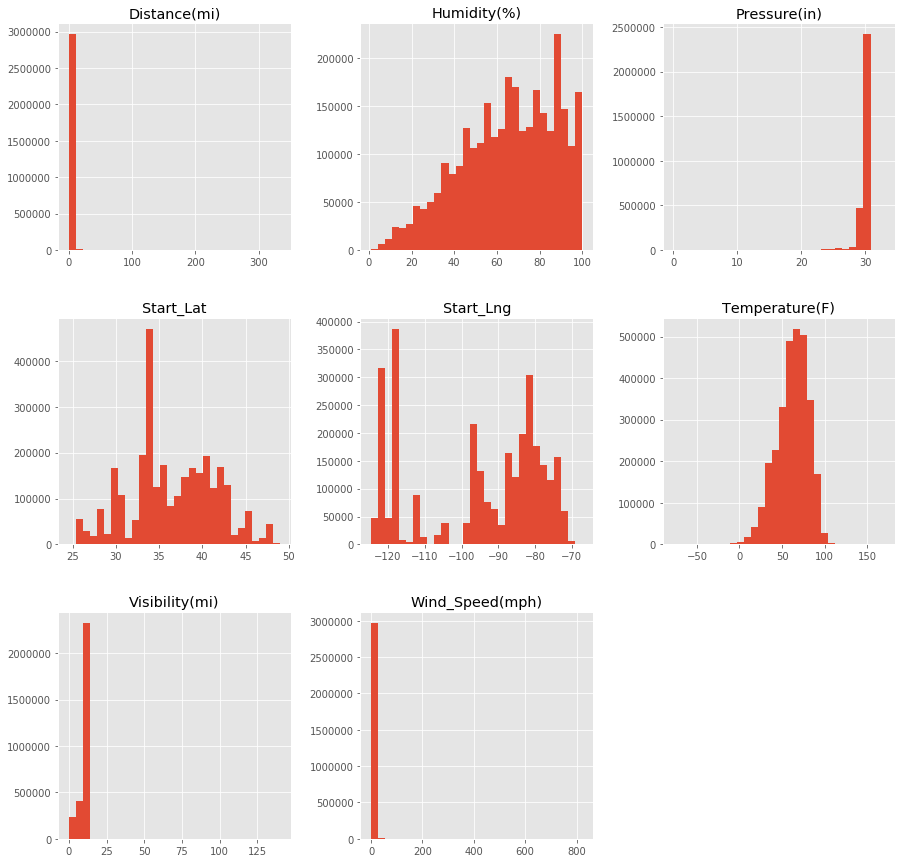

In [7]:
#Disribution of qua during accidents
qvariables.hist(bins = 30, figsize = (15,15));

### Target Distribution

Text(0, 0.5, '')

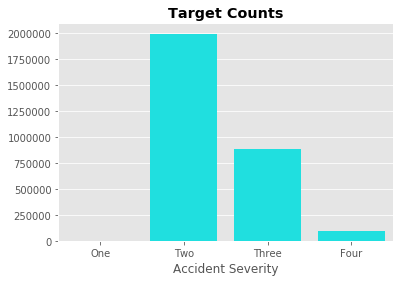

In [8]:
#Create barplot to view Severity distributions
g = sns.countplot(x='Severity', order=['One', 'Two', 'Three', 'Four'],color = 'cyan',
                 data=df)

#Set plot aesthetics
g.set_title('Target Counts', fontweight = 'bold')
g.set_xlabel('Accident Severity')
g.set_ylabel('')

# Exploratory Data Analysis

## Accident Severity Across the US

In [9]:
#Import geopandas to plot lat, long data
import geopandas as gpd
from shapely.geometry import Point, Polygon
import descartes


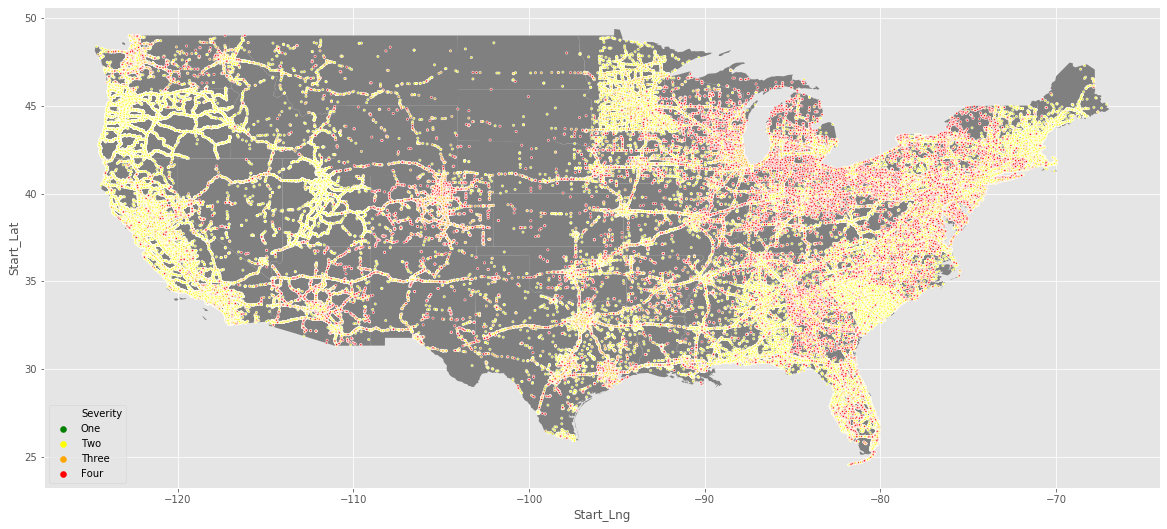

In [10]:
#Read in geo map of the United States
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\US-Accidents A Countrywide Traffic Accident Dataset\References\states_21basic'
usa = gpd.read_file(path + '/states.shp')

#Exclue Alaska and Haiwaii, traffic data does not contain info in those locations
usa = usa.loc[(usa.STATE_ABBR != 'HI') & (usa.STATE_ABBR != 'AK')]

#Plot usa
ax = usa.plot(figsize = (20,20), color = 'gray')

#Set colors to use for scatter plot
colors = ['green', 'yellow', 'orange', 'red']

#Plot scatterplot over usa
g = sns.scatterplot(x='Start_Lng', y= 'Start_Lat', hue ='Severity',s=5,
                alpha=.75, palette=colors , hue_order=['One', 'Two', 'Three', 'Four'],
                data = df, ax = ax)

#Set legend
ax.legend(loc ='lower left', 
        frameon= True, fancybox = True)

## Traffic Accidents by City

### Cities with most TOTAL Accidents

In [11]:
most_accidents = df.groupby('City')['ID'].count().sort_values(ascending = False).head(30)

top30_list = most_accidents.index.to_list()

#Get all rows that have accident data from top30
top30_df = df[df.City.isin(top30_list)].groupby(['City','Severity'])['ID'].count()

temp = top30_df.unstack('City').fillna(0).T
temp = temp.assign(temp = temp.sum(axis = 1)).sort_values('temp', ascending = False).drop('temp', 1)

temp = temp[['One', 'Two', 'Three', 'Four']]

C:\Users\kishe\Miniconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


Text(0.5, 1.0, 'Most Total Traffic Accidents by City')

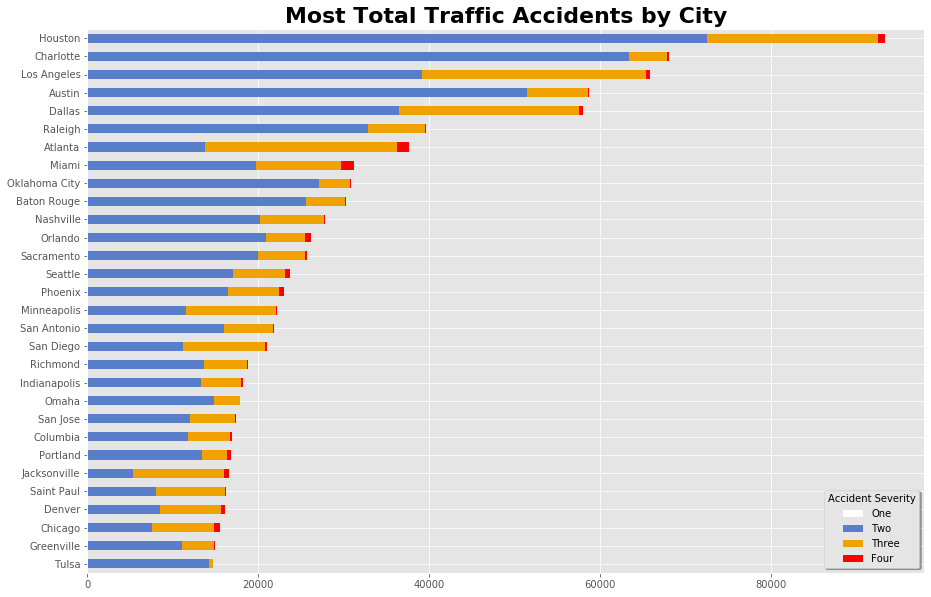

In [12]:
colors = ['#FDFFFC', '#587ECA','#F0A202','red']

ax = temp.plot(kind = 'barh', stacked = True, figsize=(15, 10), colors=colors)

ax.legend(title='Accident Severity',labels = ['One', 'Two', 'Three', 'Four'], fancybox=True, shadow=True)
ax.invert_yaxis()
ax.set_ylabel('')
ax.set_title('Most Total Traffic Accidents by City', fontweight = 'bold', fontsize = 22)

### Weather conditions

In [13]:
weather = df.groupby(['Weather_Condition', 'Severity'])['ID'].count().unstack('Weather_Condition').fillna(0).T

weather = weather[['One','Two', 'Three','Four']]

weather = weather.assign(temp = weather.sum(axis = 1)).sort_values(by = 'temp', ascending = False).drop('temp', 1)[0:15]
weather

Severity,One,Two,Three,Four
Weather_Condition,,,,
Clear,337.0000,536508.0000,244865.0000,26461.0000
Mostly Cloudy,137.0000,272307.0000,128741.0000,11343.0000
Overcast,115.0000,248636.0000,119881.0000,13848.0000
Fair,74.0000,253238.0000,72440.0000,9537.0000
Partly Cloudy,95.0000,199668.0000,88409.0000,7267.0000
Scattered Clouds,73.0000,132613.0000,66012.0000,5964.0000
Light Rain,40.0000,90480.0000,46382.0000,4171.0000
Cloudy,22.0000,83966.0000,28030.0000,3478.0000
Unavailable,21.0000,40212.0000,22730.0000,2970.0000


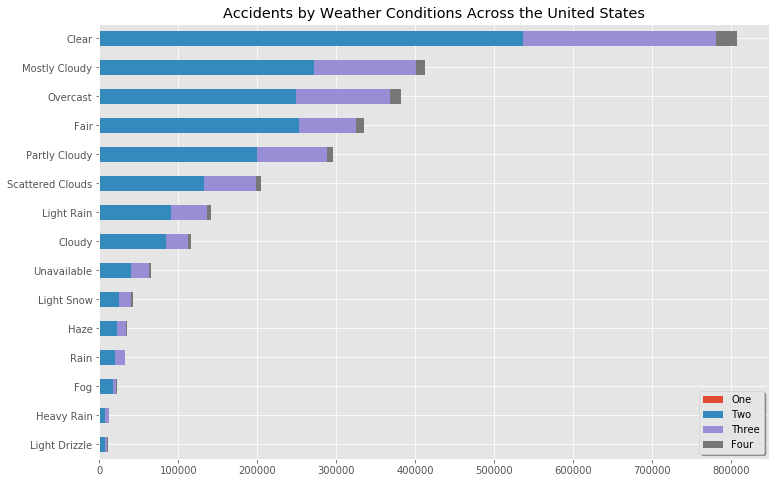

In [14]:
plt = weather.plot(kind = 'barh',stacked = True, figsize = (12,8))

plt.invert_yaxis()
plt.set_ylabel('')
plt.set_title('Accidents by Weather Conditions Across the United States')
plt.legend(shadow = True,fancybox = True)

### Accidents based on during the day or the night

In [15]:
#Create a list of cols to iterate over to get sums of true and false
cols = df.select_dtypes(include='int64').columns

bools = pd.DataFrame(cols)
bools.rename(columns = {0: 'Features'}, inplace = True)

trues= []
falses = []
for col in df[cols]:
    trues.append(df[col].values.sum())
    falses.append(len(df[df[col]==0]))

bools['True_Count'] = trues

bools['False_Count'] = falses

bools['Total'] = bools.sum(axis=1)



Text(0, 0.5, 'Boolean Features')

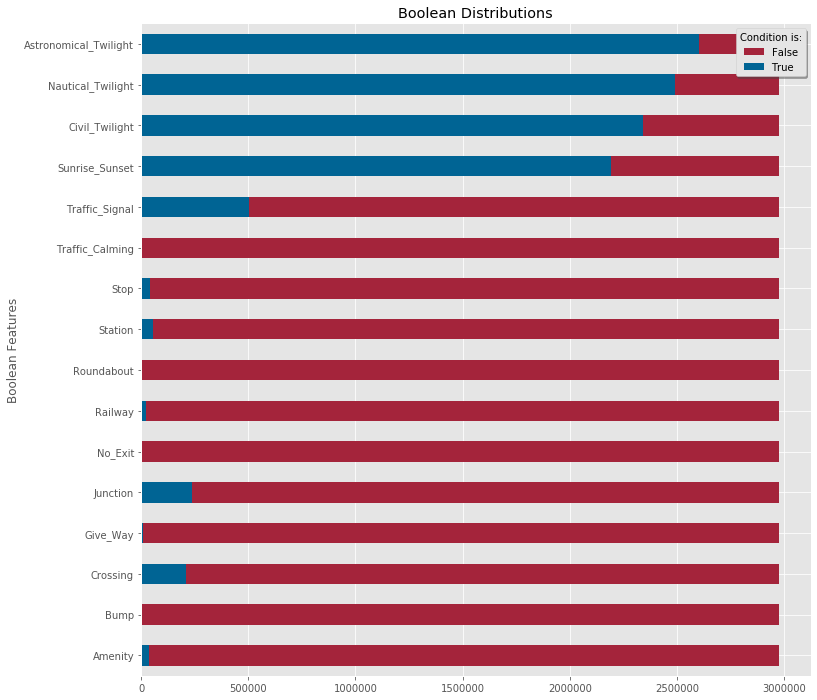

In [16]:
ax = bools.plot(x='Features', y = 'Total', kind = 'barh', figsize = (12,12), color = '#A4243B', label = 'False')
bools.plot(x='Features', y = 'True_Count', kind = 'barh',ax=ax, color = '#006494', label = 'True')

ax.legend(title = 'Condition is:', fancybox=True, shadow=True)
ax.set_title('Boolean Distributions')
ax.set_ylabel('Boolean Features')

Most accidents happen during the day, specifically during certain hours of the day, closert to sunrise or sunset. Appears to be mostly on the highways while making the commute to work/

This would actually explain why weather severity wasn't the leading indicator of accidents. It appears most accidents are happening everyday on the drive to and from work



In [17]:
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\US-Accidents A Countrywide Traffic Accident Dataset\References'

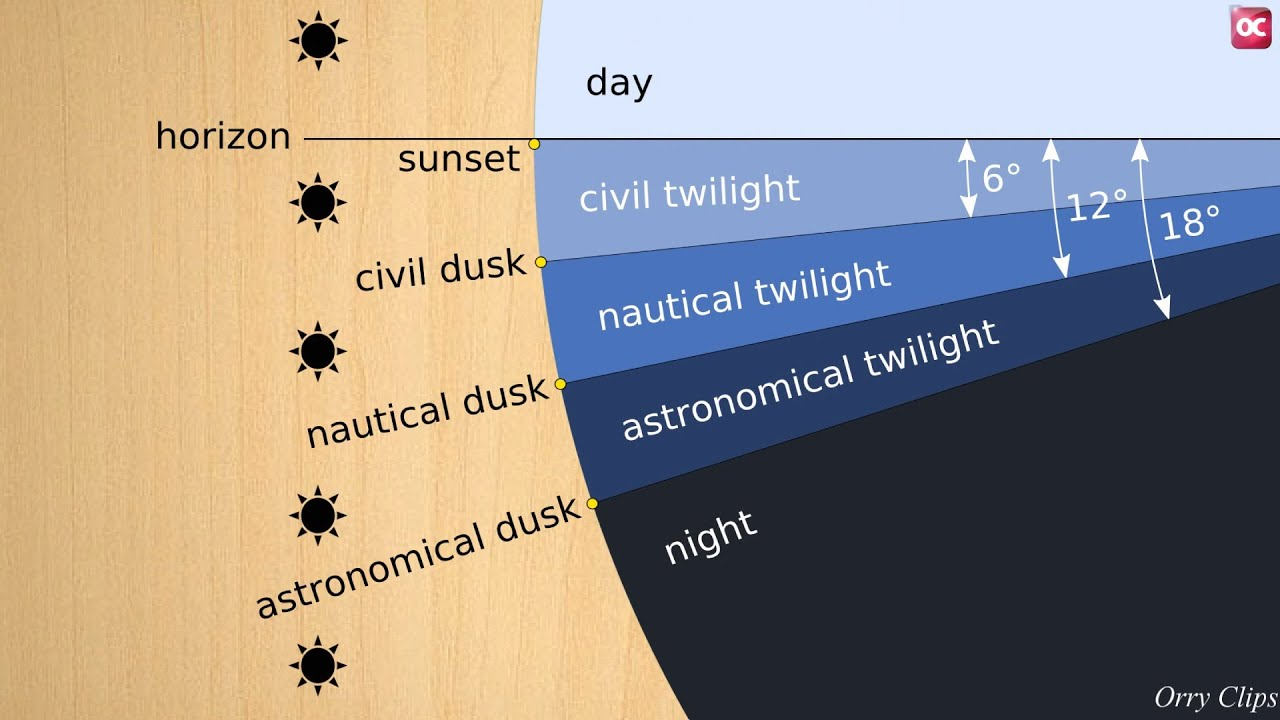

In [18]:
from IPython.display import Image
Image(filename=path + '/Twilight phases.png', width= 1000, height=600) 

### Tire pressure Distributions by accident severity

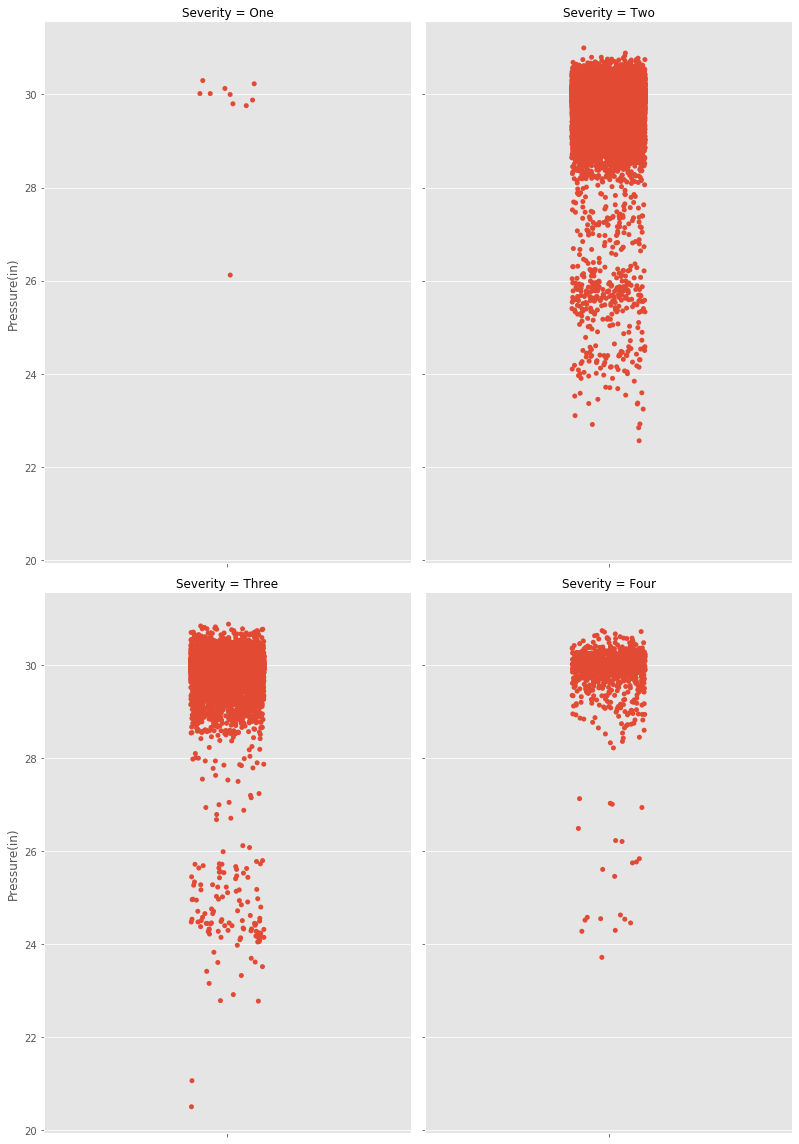

In [19]:
#Create a 
g = sns.catplot(col = 'Severity',  y= 'Pressure(in)',aspect=.7,height=8,col_wrap=2,
            col_order = ['One', 'Two', 'Three', 'Four'], data = df[::100])

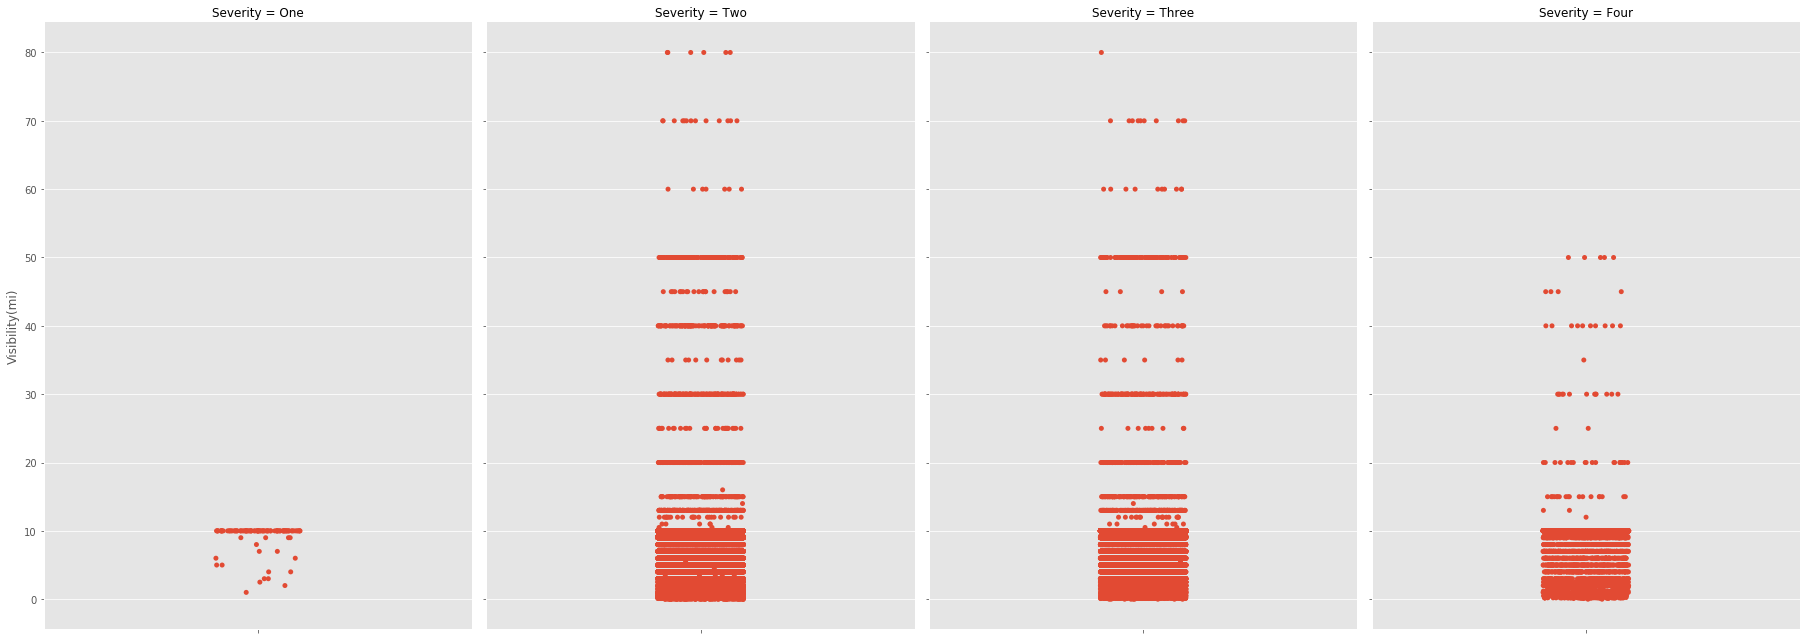

In [20]:
sns.catplot(col = 'Severity',  y= 'Visibility(mi)',aspect=.7,height=9,
            col_order = ['One', 'Two', 'Three', 'Four'], data = df[::10])

May suggest that poorer visibility constitutes the need to drive slower and more carefully.

### Time Delay Due to accidents

In [25]:
#Create delay column that calculates minutes of traffic delay caused by the accident

#df['Delay'] = pd.Timedelta(df['End_Time'] - df['Start_Time']).seconds / 3600

def minute_calc(start, end):
    #takes cols that indicate starting and endtimes
    diff = pd.Timedelta(start - end).seconds / 3600
    return diff
    
minute_calc(df['End_Time'], df['Start_Time'])

ValueError: Value must be Timedelta, string, integer, float, timedelta or convertible

In [28]:
pd.Timestamp(df['Start_Time'])

TypeError: Cannot convert input [0         2016-02-08 05:46:00
1         2016-02-08 06:07:59
2         2016-02-08 06:49:27
3         2016-02-08 07:23:34
4         2016-02-08 07:39:07
                  ...        
2974331   2019-08-23 19:11:30
2974332   2019-08-23 19:00:21
2974333   2019-08-23 19:00:21
2974334   2019-08-23 18:52:06
2974335   2019-08-23 18:52:06
Name: Start_Time, Length: 2974336, dtype: datetime64[ns]] of type <class 'pandas.core.series.Series'> to Timestamp